In [20]:
import pandas as pd
import os
import numpy as np

In [2]:
data_folder = r'\\wi-bigdata.wi.mit.edu\solexa_weissman\puzheng\KP_mouse'

In [4]:
os.listdir(data_folder)
data_filename = os.path.join(data_folder, 'bulk_rna_seq.xlsx')
data_df = pd.read_excel(data_filename)

In [26]:
data_df['mean_exp'] = data_df.values[:,9:].astype(np.float32).mean(1)

In [10]:
ref_data_filename = os.path.join(data_folder, r'Meng_258_genes.xlsx')
ref_data_df = pd.read_excel(ref_data_filename)

0        False
1        False
2        False
3        False
4        False
         ...  
10898    False
10899    False
10900    False
10901    False
10902    False
Name: Gene symbol, Length: 10903, dtype: bool

In [35]:
matched_genes = []
matched_exps = []
for _gene in ref_data_df['Gene']:
    try:
        if _gene.upper() in data_df['Gene symbol'].values:
            #print(_gene)
            #print()
            matched_genes.append(_gene)
            matched_exps.append(data_df.loc[data_df['Gene symbol']==_gene.upper(), 'mean_exp'].values[0])
            
    except:
        continue
    

(array([75., 13.,  5., 10.,  4.,  7.,  0.,  4.,  3.,  1.,  2.,  2.,  3.,
         2.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.,
         1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  2.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
        52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
        65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
 

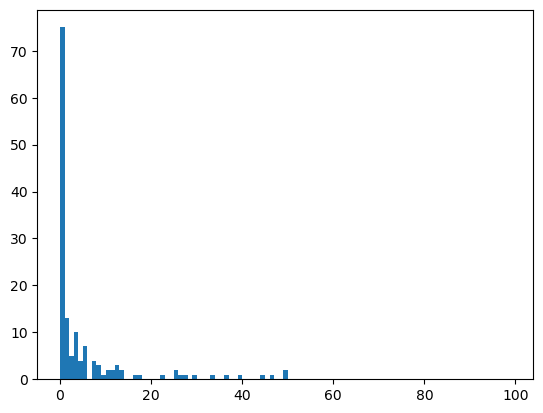

In [38]:
import matplotlib.pyplot as plt

plt.figure()

plt.hist(matched_exps, bins=np.arange(0,100))

In [40]:
np.sum(np.array(matched_exps) > 5)

44